# Unsupervised Learning

<center><img src="https://miro.medium.com/v2/resize:fit:1200/1*o4PXxETRsZV_AjLhOxGk-g.png" alt="Drawing" style="width: 800px; height: 400px;" /></center>

<div style="text-align: right"> 
  <small>medium.com</small>
</div>






© 2023 [University of Illinois at Chicago](https://www.uic.edu/). All rights reserved.

## Learning Objectives

1. [Introduction](#Introduction)
2. [Centroid-based Clustering](#Centroid-based-Clustering)
   - [K-means Clustering](#K-means-Clustering)
   - [Optimal K with Elbow Plot](#Optimal-K-with-Elbow-Plot)
3. [Density-based Clustering](#Density-based-Clustering)
   - [DBSCAN (Density-based Spatial Clustering)](#DBSCAN-(Density-based-Spatial-Clustering))
4. [Hierarchical Clustering](#Hierarchical-Clustering)
   - [Dendrogram](#Dendrogram)
   - [Agglomerative Clustering in scikit-learn](#Agglomerative-Clustering-in-scikit-learn)




## Introduction

Unsupervised learning is a category of machine learning in which algorithms explore and identify patterns to analyze and cluster unlabeled datasets. These algorithms discover hidden patterns or groupings in the data without the need for human intervention. It is ideal for various applications, including exploratory data analysis, cross-selling strategies, customer segmentation, and image recognition, making it a valuable tool in data analysis, pattern recognition, and segmentation tasks.

Unsupervised learning models are primarily used for three tasks: clustering, association, and dimensionality reduction.


Clustering can be primarily subdivided into a few categories: 1. Centroid-based Clustering, 2. Density-based Clustering, 3. Hierarchical Clustering, and 4. Distribution-based Clustering.



<center><img src="https://miro.medium.com/v2/resize:fit:1200/1*rw8IUza1dbffBhiA4i0GNQ.png" alt="Drawing" style="width: 500px; height: 250px;" /></center>

<div style="text-align: right"> 
  <small>towardsdatascience.com</small>
</div>





## Centroid-based Clustering

Centroid-based clustering groups data based on similarity to centroids, minimizing the distance between data points and their respective cluster centers. K-means, one of the most popular centroid-based clustering algorithms, exemplifies this approach, serving data segmentation and pattern recognition tasks efficiently, and facilitating data-driven insights in a straightforward manner.

K-means, a popular centroid-based clustering algorithm, divides data into 'K' distinct clusters based on feature similarity. It seeks to locate 'K' cluster centers (centroids) so that data points within the same cluster are closer to their respective centroid than to others. K-means is widely applied in fields like image compression and customer segmentation due to its efficiency and ease of implementation, making it a fundamental tool in unsupervised learning


### K-means Clustering

Step-1: Select the number K to decide the number of clusters.

Step-2: Select random K points or centroids. (It can be other from the input dataset).

Step-3: Assign each data point to their closest centroid, which will form the predefined K clusters.

Step-4: Calculate the variance and place a new centroid of each cluster.

Step-5: Repeat the third steps, which means reassign each datapoint to the new closest centroid of each cluster.

Step-6: If any reassignment occurs, then go to step-4 else go to FINISH.

Step-7: The model is ready.


<div style="text-align: right"> 
  <small>javatpoint.com</small>
</div>




<center><img src="https://dashee87.github.io/images/kmeans.gif" alt="Drawing" style="width: 500px; height: 250px;" /></center>

<div style="text-align: right"> 
  <small>dashee87.github.io/</small>
</div>



We will use the Scikit-Learn library to implement the K-Means algorithm.

#### Load the Dataset

In [1]:
import pandas as pd

data =  pd.read_csv('band_Gap.csv')

data.head(5)

,Number,MendeleevNumber,AtomicWeight,MeltingT,Column,Row,CovalentRadius,Electronegativity,NsValence,NpValence,...,NsUnfilled,NpUnfilled,NdUnfilled,NfUnfilled,NUnfilled,GSvolume_pa,GSbandgap,GSmagmom,SpaceGroupNumber,band_gap
0,2.500000,89.500000,4.257630,26.270000,4.500000,1.250000,41.000000,2.410000,1.250000,0.750000,...,0.750000,0.750000,0.0,0.0,1.500000,8.653437,7.499000,0.0,194.000000,4.3412
1,10.000000,82.375000,20.369348,158.393750,15.000000,2.375000,84.500000,2.721250,2.000000,3.000000,...,0.000000,3.000000,0.0,0.0,3.000000,17.694308,4.632500,0.0,122.000000,3.5600
2,6.000000,61.750000,12.240275,160.710000,11.500000,2.000000,85.250000,2.525000,1.750000,2.250000,...,0.250000,2.250000,0.0,0.0,2.500000,15.224896,4.827750,0.0,202.750000,3.6643
3,9.333333,60.666667,18.701880,135.113333,6.000000,2.333333,100.000000,2.153333,1.333333,1.333333,...,0.666667,0.666667,0.0,0.0,1.333333,29.608889,2.617667,0.0,145.000000,3.6839
4,10.000000,84.000000,20.326621,145.050000,15.333333,2.333333,81.333333,2.890000,2.000000,3.333333,...,0.000000,2.666667,0.0,0.0,2.666667,15.481329,2.687333,0.0,69.333333,5.1829


In [2]:
data.columns

Index(['Number', 'MendeleevNumber', 'AtomicWeight', 'MeltingT', 'Column',
       'Row', 'CovalentRadius', 'Electronegativity', 'NsValence', 'NpValence',
       'NdValence', 'NfValence', 'NValence', 'NsUnfilled', 'NpUnfilled',
       'NdUnfilled', 'NfUnfilled', 'NUnfilled', 'GSvolume_pa', 'GSbandgap',
       'GSmagmom', 'SpaceGroupNumber', 'band_gap'],
      dtype='object')

#### We will select a subset of features to display different clustering algorithms

In [3]:
data_sub = data[['Electronegativity','MeltingT','Row','AtomicWeight','band_gap']]

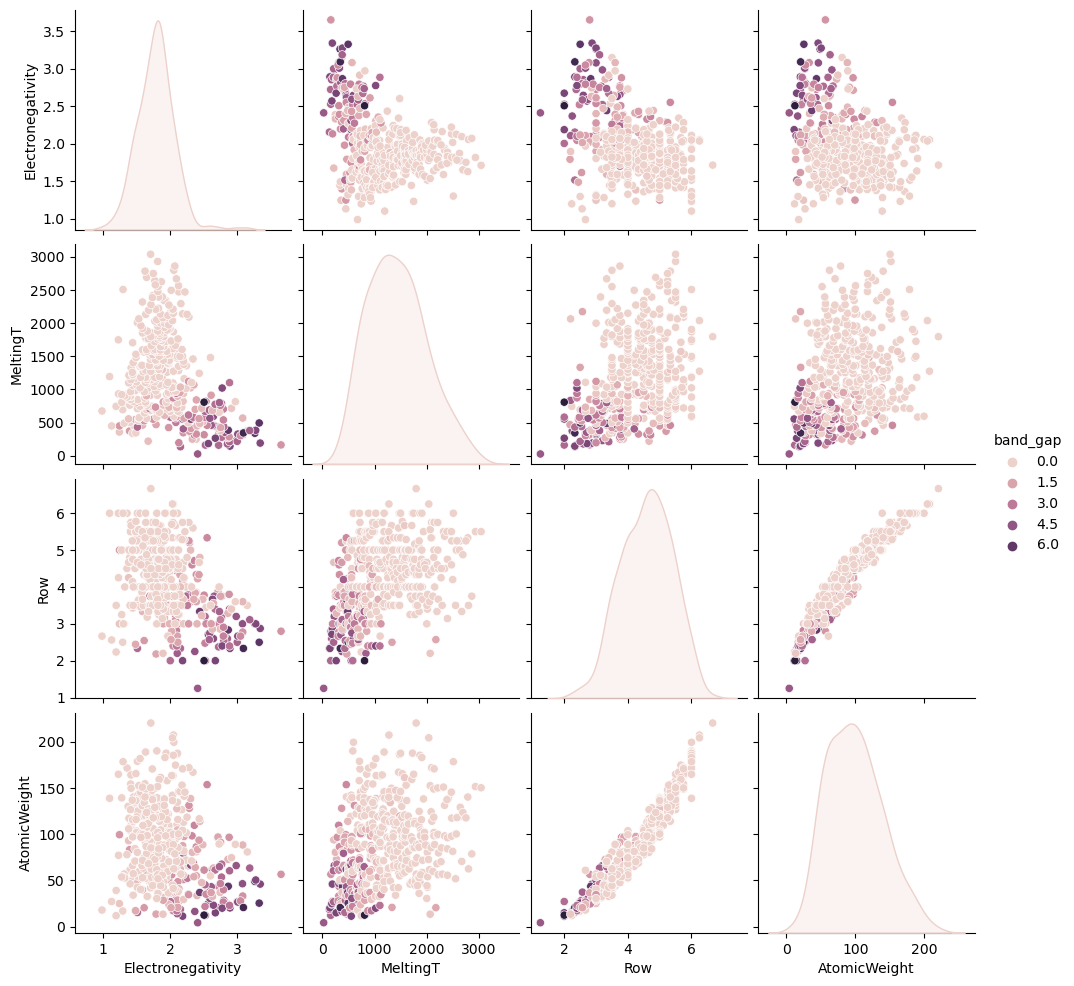

In [4]:
import matplotlib.pyplot as plt
from itertools import combinations
import seaborn as sns


prplot = sns.pairplot(data_sub, hue='band_gap')

**Clustering**

In [7]:
from sklearn.cluster import KMeans
import numpy as np
X = data_sub[['Electronegativity','MeltingT']].values
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
kmeans.labels_


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,

#### Let's visualize the clusters

Text(0, 0.5, 'MeltingT')

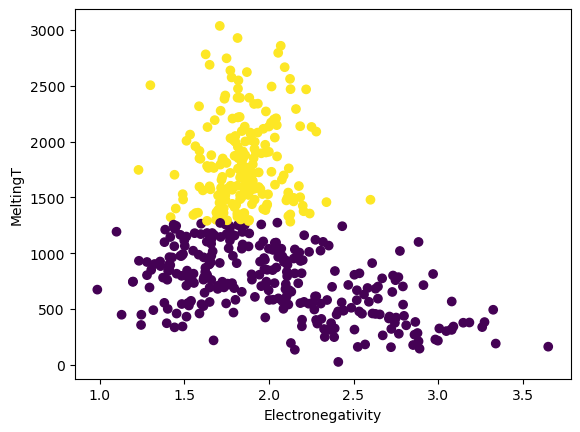

In [8]:
plt.scatter(X[:,0],X[:,1],c=kmeans.labels_)
plt.xlabel('Electronegativity')
plt.ylabel('MeltingT')

### Optimal K with Elbow Plot

In [9]:
# Calculate SSE for different K
sse = []
list_k = list(range(1, 10))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(X)
    sse.append(km.inertia_)


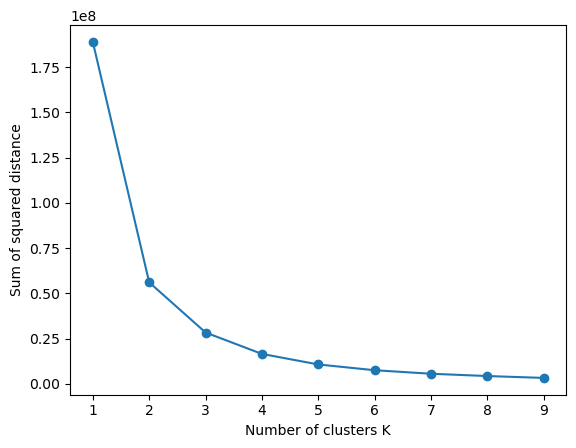

In [10]:
# Plot sse against k
plt.plot(list_k, sse, '-o')
plt.xlabel('Number of clusters K')
plt.ylabel('Sum of squared distance')
plt.show()


**Q. What is the optimal number of clusters ?**

## Density-based Clustering

Density-based clustering, such as DBSCAN, identifies clusters based on data point density. It's excellent for detecting clusters of various shapes and handling data noise, making it valuable in real-world applications like anomaly detection and geographic data analysis.



### DBSCAN (Density-based Spatial Clustering)


The key steps in DBSCAN clustering are:

1. **Define parameters**: Set the two major hyperparameters:
   - `eps` (epsilon): The maximum distance between two points for them to be considered neighbors.
   - `min_samples`: The minimum number of neighbors a point needs to have to be considered a core.

2. **Identify Core Points**: Determine which points are core points based on how many neighbors they have within the `eps` distance. If a point has `min_samples` or more points in its neighborhood, it is considered a core point.

3. **Expand Clusters**: For each core point, if it's not already assigned a cluster, create a new cluster. Find all points that are within `eps` distance of the core point (including the core point itself) and assign them to the cluster. If any of these points is also a core point, repeat the process for those points.

4. **Assign Outliers**: After all core points have been processed and assigned to clusters, any points that are not assigned to a cluster are considered noise or outliers.

<div style="text-align: right"> 
  <small>baeldung.com</small>
</div>



<center><img src="https://dashee87.github.io/images/DBSCAN_search.gif" alt="Drawing" style="width: 500px; height: 250px;" /></center>

<div style="text-align: right"> 
  <small>dashee87.github.io/</small>
</div>


In [11]:
from sklearn.cluster import DBSCAN



X =  data_sub[['Electronegativity','AtomicWeight']].values


clustering = DBSCAN(eps=2, min_samples=2).fit(X)
clustering.labels_


array([-1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  2,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,
        3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        1,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  4,  0,  0,  1,  0,  2,  0,  0,
        0,  0,  0,  0,  0,  5,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  6,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        2,  0,  0,  2,  0,  0,  0,  0,  1,  1,  7,  0,  0,  2,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  5,  0,  0,  0,  0,  0,  0,  0,  1,  0,
        0,  0,  1,  0,  0,  0,  1,  1,  0,  0,  1,  0,  0,  0,  0,  1, -1,
        2,  0,  0,  0,  0

#### Let's visualize the clusters

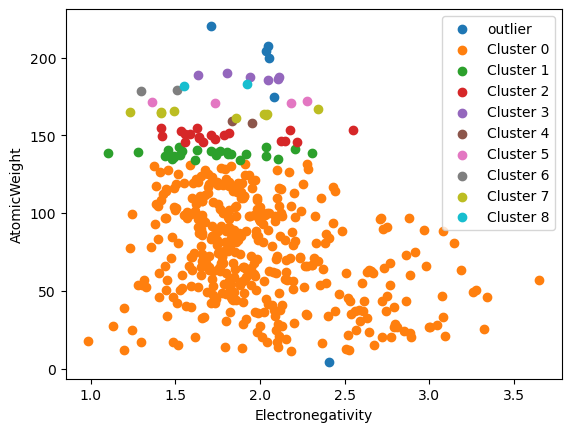

In [12]:
from collections import Counter

a = dict(Counter(clustering.labels_))

counter = 0

for key in a.keys():
    idx = np.where(clustering.labels_==key)[0]
    if key ==-1:
        label = 'outlier'
    else:
        label = "Cluster {}".format(counter)
        counter+=1
        
    
    plt.scatter(X[idx,0],X[idx,1],label =label)
    
    
plt.xlabel('Electronegativity')
plt.ylabel('AtomicWeight')
plt.legend()
    

## Hierarchical Clustering


Hierarchical clustering is a versatile unsupervised learning method that organizes data into a hierarchical structure of clusters. It begins by treating each data point as a single cluster and then successively combines them into larger clusters based on their similarity. This results in a tree-like structure known as a dendrogram, providing insights into the relationships and hierarchy of clusters. Hierarchical clustering doesn't require the pre-specification of the number of clusters, making it valuable for exploratory data analysis and understanding the natural grouping of data.



### Dendrogram

A dendrogram is a tree-like diagram used to visualize hierarchical clustering results. Dendrograms display the hierarchy of clusters and the relationships between them. In data analysis, dendrograms help identify natural groupings and reveal the structure within data.




<center><img src="https://dashee87.github.io/images/hierarch.gif" alt="Drawing" style="width: 500px; height: 250px;" /></center>

<div style="text-align: right"> 
  <small>dashee87.github.io/</small>
</div>



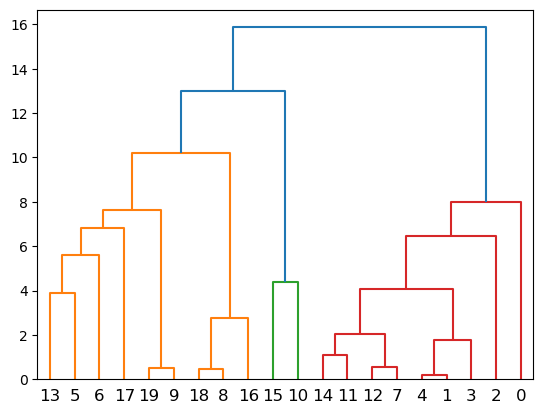

In [13]:
from scipy.cluster.hierarchy import dendrogram, linkage



X =  data_sub[['Electronegativity','AtomicWeight']].values[:20,:] # A subset 

linked = linkage(X, 'single')


# Draw the dendrogram
dendrogram(linked,
            orientation='top',

            distance_sort='descending',
            show_leaf_counts=True)
plt.show()



### Agglomerative Clustering in scikit-learn





<center><img src="https://www.datanovia.com/en/wp-content/uploads/dn-tutorials/003-hierarchical-clustering-in-r/images/hierarchical-clustering-agnes-diana.png" alt="Drawing" style="width: 500px; height: 250px;" /></center>

<div style="text-align: right"> 
  <small>datanovia.com</small>
</div>






In [14]:
from sklearn.cluster import AgglomerativeClustering

X =  data_sub[['Electronegativity','AtomicWeight']].values

clustering = AgglomerativeClustering(n_clusters=2).fit(X)
clustering
clustering.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,

Text(0, 0.5, 'AtomicWeight')

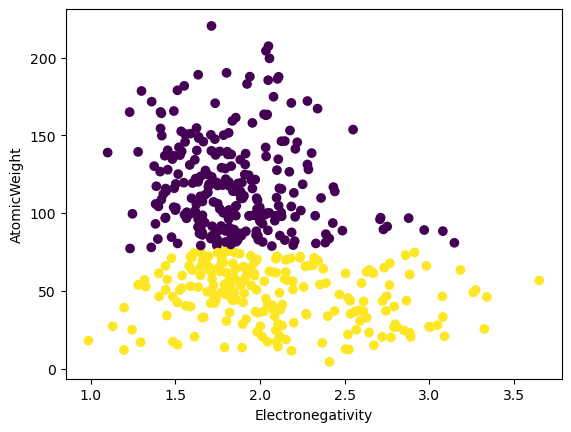

In [15]:
plt.scatter(X[:,0],X[:,1],c=clustering.labels_)
plt.xlabel('Electronegativity')
plt.ylabel('AtomicWeight')